In [1]:
%pylab nbagg
%load_ext autoreload

%autoreload 2

Populating the interactive namespace from numpy and matplotlib


### Now what would fastCat think of this?

#### We can loop through this

This runs off of a modified xpecgen that returns only the doses and 

In [4]:
import sys
import os
import tigre
from scipy.signal import fftconvolve

import fastcat.fastcat as fc

dose = 0

# phan_map_hard =  ['air','water','Spongiosa_Bone_ICRP','G4_BONE_COMPACT_ICRU',
#              'G4_BONE_CORTICAL_ICRP','C4_Vertebra_ICRP','D6_Vertebra_ICRP','G4_B-100_BONE']

phan_map_hard =  ['air','water','water','water',
             'water','water','water','water']


phan_map_g4 = ['air','water','G4_LUNG_ICRP',"G4_BONE_COMPACT_ICRU","G4_BONE_CORTICAL_ICRP","G4_ADIPOSE_TISSUE_ICRP","G4_BRAIN_ICRP","G4_B-100_BONE"] 

spectrum_files = ['Al_spectrum_25', 'C_spectrum_6', 'Al_spectrum_6', 'C_spectrum_25', 'W_spectrum_6', 'W_spectrum_25']

dets = ['CuGOS-784-micrometer']

phan_maps = [phan_map_hard]#,phan_map_soft]

angles = np.linspace(0,2*np.pi,2)

res = []

original_energies_keV = np.array([30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])


angles = np.linspace(0,2*pi,2)

geo = 'catphan_low_contrast_512'

phantom = fc.Catphan_515()

for phan_map in phan_maps:
    for spectrum_file in spectrum_files[-1:]:
        for det in dets:
            s = fc.Spectrum()
            s.load(spectrum_file)

            kernel = fc.Kernel(s, det)
            
#             kernel.add_focal_spot(0.1)

            energy_deposition_file = os.path.join(
                fc.data_path, "Detectors", det, 'EnergyDeposition.npy')
            energies = s.x
            fluence = s.y
            deposition_efficiency_file = energy_deposition_file

            res.append(phantom.return_projs(kernel,s,angles,
                                       nphoton=None,
                                      mgy=dose,return_dose=True))

#             img_fc = tigre.algorithms.FDK(
#                 np.transpose(np.array(projs_fc[0]),[0,2,1]), phantom.geomet,angles)

#             res.append([[phan_map,spectrum_file,det],phantom.analyse_515(img_fc[5])])

(19, 41, 41) 19


## Working attempt

<IPython.core.display.Javascript object>


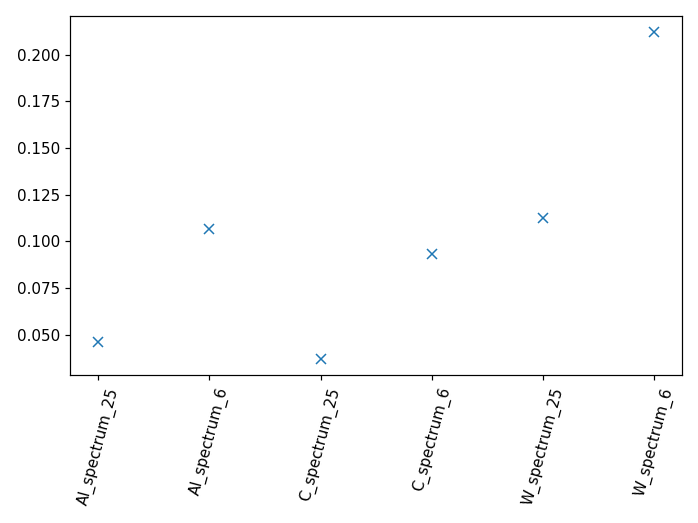

(19, 41, 41) 19
(19, 41, 41) 19
(19, 41, 41) 19
(19, 41, 41) 19
(19, 41, 41) 19
(19, 41, 41) 19


In [7]:
spectrum_files = sorted(['Al_spectrum_25', 'C_spectrum_6', 'Al_spectrum_6', 'C_spectrum_25', 'W_spectrum_6', 'W_spectrum_25'])

plt.figure()

doses = res[0][0]
doses_fc = []

# Loading the file from the monte carlo
deposition = np.load(deposition_efficiency_file,allow_pickle=True)

for jj,spectrum_file in enumerate(spectrum_files):
    
    s = fc.Spectrum()
    s.load(spectrum_file)
    kernel = fc.Kernel(s, det)
    energy_deposition_file = os.path.join(
        fc.data_path, "Detectors", det, 'EnergyDeposition.npy')
    energies = s.x
    fluence = s.y

    # These are what I used in the Monte Carlo
    original_energies_keV = np.array([10,20,30, 40, 50 ,60, 70, 80 ,90 ,100 ,300 ,500 ,700, 900, 1000 ,2000 ,4000 ,6000])

    # This is a scaling factor that I found to work to convert energy deposition to photon probability eta
    deposition_summed = deposition[0]/(original_energies_keV/1000)/1000000
    fluence_norm = fluence/np.sum(fluence)
    deposition_long = np.interp(energies,original_energies_keV/1000,deposition_summed)
    nphotons_at_energy = fluence_norm*deposition_long
    nphotons_av = np.sum(nphotons_at_energy)
    
    # Binning to get the fluence per energy
    large_energies = np.linspace(0,6000,3001) #keV
    fluence_large = np.interp(large_energies,np.array(energies), fluence)
    fluence_small = np.zeros(len(original_energies_keV))
    
    inds = []
    # Still binning
    for ii, val in enumerate(large_energies):

        index = np.argmin(np.abs(original_energies_keV-val))
        fluence_small[index] += fluence_large[ii] 
        inds.append(index)

    # Normalize
    fluence_small /= np.sum(fluence_small)

    # Sum over the image dimesions to get the energy intensity and multiply by fluence
    doses_fc.append((doses/1000)@((fluence_small)))

plt.plot(doses_fc,'x')    
plt.xticks(ticks=range(len(spectrum_files)),labels=spectrum_files,rotation=75)
plt.tight_layout()

<IPython.core.display.Javascript object>


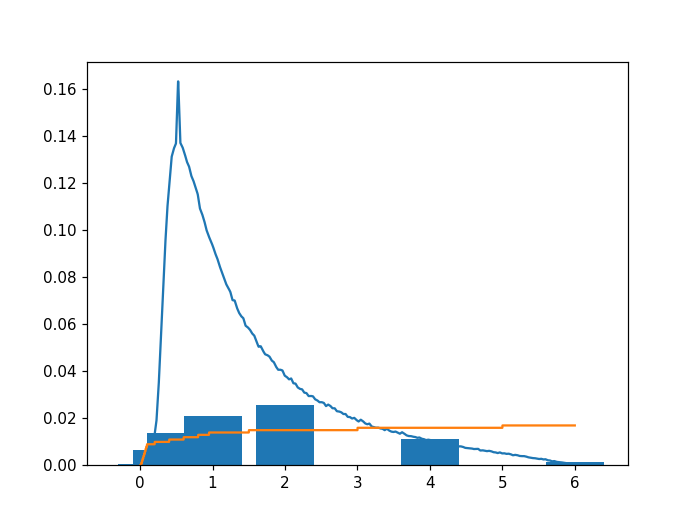

In [8]:
figure();plot(large_energies/1000,100*fluence_large/sum(fluence_large));bar(original_energies_keV/1000,fluence_small/10);plot(large_energies/1000,np.array(inds)/1000)

In [9]:
doses = np.array([
1.613708349168519e-07,
1.313530049174005e-07,
6.200432949299284e-07,
3.304057543118688e-07,
2.999242099122057e-07,
3.515523019359534e-07,
])

names = np.array([
'Dose_Al_spectrum_25'  ,
'Dose_C_spectrum_25'  ,
'Dose_W_spectrum_6',
'Dose_Al_spectrum_6'  , 
'Dose_C_spectrum_6',
'Dose_W_spectrum_25'])

indeces = np.argsort(names)


names = names[indeces]
doses = doses[indeces]

indeces = np.argsort(doses)

names = names[indeces]
doses = doses[indeces]


In [22]:
3.515523019359534e-07*1000*360*10

1.2655882869694322

<IPython.core.display.Javascript object>


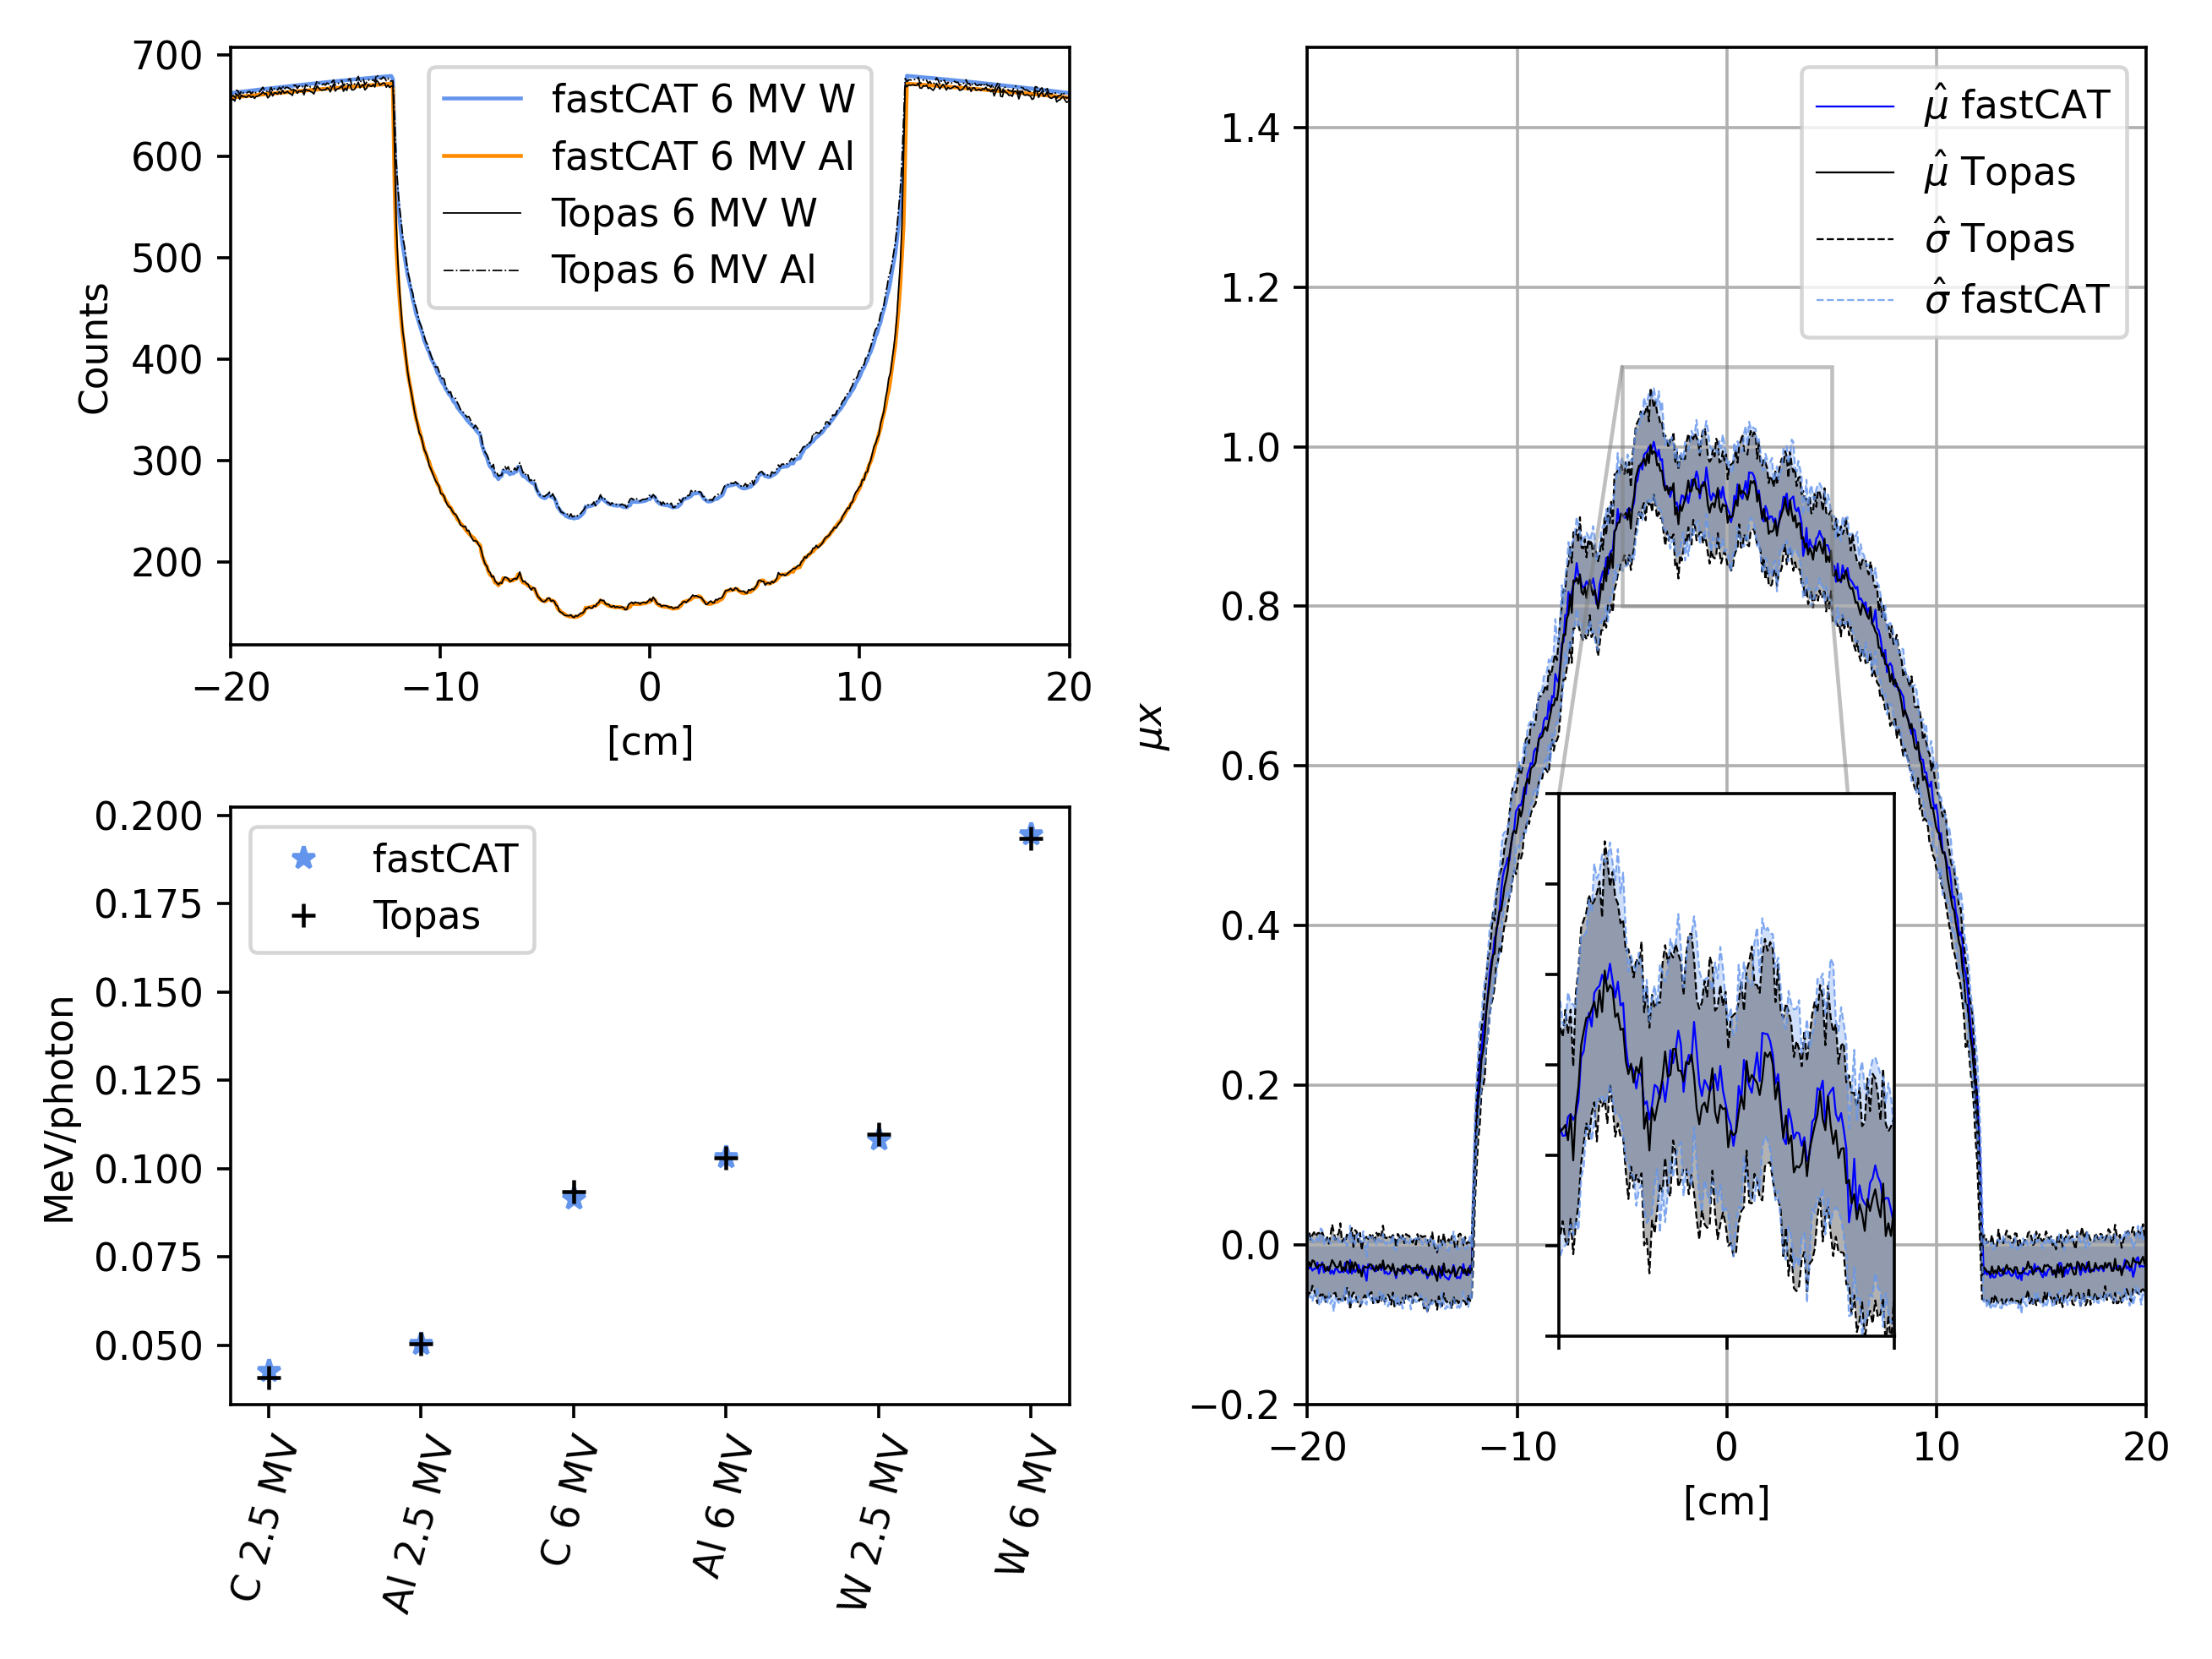

/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and

In [11]:
import pandas as pd
import scipy as sp

d_norm = doses#/sum(doses)

doses_fc2 = np.array(doses_fc)
doses_fc2 = doses_fc2[indeces]

shorts = ['C 2.5 MV', 'Al 2.5 MV', 'C 6 MV',
       'Al 6 MV', 'W 2.5 MV', 'W 6 MV']
dat = pd.DataFrame(d_norm/20000000/(1.6021766e-16 * 1000),index=shorts)

fig = plt.figure(figsize=[8,6],dpi=300)

topas = np.load('/home/xcite/scintillators/Catphan_dose/batch_submission/projs_new_npys.npy')

# for figures W25CWOcoh_working.npy
fastCat = np.load('/home/xcite/fastcat-0.0.1/fastcat/data/projs/similar_noise8.npy')#fastCat_topas_equiv_8cm_W.npy')


ax = fig.add_subplot(122)#,box_aspect=1.5)

plt.fill_between(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10, 
                 np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10 ,alpha=0.3, facecolor='cornflowerblue')

plt.fill_between(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),
                 np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),alpha=0.3, facecolor='k')

plt.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10,lineWidth= .5,color='b')
plt.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1),lineWidth= .5,color='k')
    
plt.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

plt.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

plt.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

plt.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

plt.legend(['$\hat{\mu}$ fastCAT', '$\hat{\mu}$ Topas', '$\hat{\sigma}$ Topas', '$\hat{\sigma}$ fastCAT'],loc='upper right')
            

# inset axes....
axins = ax.inset_axes([0.3, 0.05, 0.4, 0.4])

axins.fill_between(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10, 
                 np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10 ,alpha=0.3, facecolor='cornflowerblue')

axins.fill_between(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),
                 np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),alpha=0.3, facecolor='k')

axins.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

axins.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

axins.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

axins.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

axins.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10,lineWidth= .5,color='b')
axins.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1),lineWidth= .5,color='k')

plt.xlim([-20,20])
plt.ylim([-0.2,1.5])

plt.grid()
# sub region of the original image
x1, x2, y1, y2 = -5, 5, 0.8, 1.1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

plt.ylabel('$\mu x$')
plt.xlabel('[cm]')
plt.tight_layout()

ax.indicate_inset_zoom(axins)

plt.subplot(223)
# plt.plot(doses_fc2,d_norm/20000000/(1.6021766e-16 * 1000),'kx')

pp = np.polyfit(doses_fc2,d_norm/20000000/(1.6021766e-16 * 1000),1)
xx = np.linspace(0.040,0.2,100)
yy = np.polyval(pp,xx)

# plt.plot(xx,yy,':',color='cornflowerblue')
# plt.ylabel('fastCAT')
# plt.xlabel('Topas')

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(doses_fc2,d_norm/20000000/(1.6021766e-16 * 1000),)
# plt.legend(['Simulations',f'linear fit: y = {np.round(pp[0],3)}x + {np.round(pp[1],3)}, \n $r^2$= {np.round(r_value,4)}'])

plt.plot(doses_fc2*pp[0] + pp[1],'*',color='cornflowerblue')
plt.plot(dat,'k+')
# plt.plot(doses_fc/sum(doses_fc),'x')
plt.xticks(rotation=75)
plt.ylabel('MeV/photon')
plt.legend(['fastCAT','Topas'])
plt.tight_layout()

plt.subplot(221)

# plt.text(0,0,'c',color='k',bbox={'xy', 'width', 'height', 'boxstyle':'round'});ax.add_artist(circle1)
# plt.p
scats = np.load('al_and_w_curves.npy')

real_spec = np.load('data/w_spec_profile.npy')
real_spec_water = np.load('data/w_spec_profile_water.npy')
real_spec_water_2 = np.load('w_spec6_profile_water.npy')
# real_spec_water_3 = np.load('w_spec6_profile_water_2.npy')
real_spec_CT = np.load('/home/xcite/scintillators/Catphan_dose/batch_submission_W/analysis/Readout_0000.phsp.npy')

dist = np.linspace(-256*0.0784 - 0.0392,256*0.0784 - 0.0392, 512)

plt.plot(dist,scats[0],linewidth = 1.0,color = 'cornflowerblue')
plt.plot(dist,scats[1],linewidth = 1.0,color = 'darkorange')
plt.plot(dist,real_spec,'k-',linewidth = 0.4)
plt.plot(dist,np.mean(real_spec_CT,0),'k-.',linewidth = 0.4,markersize=0.4)
plt.xlim([-20,20])
# plt.ylim([0,710])

# plt.plot(dist,real_spec_water_2,'k--',linewidth = 0.7)
# plt.plot(real_spec_water_3*2,'k--',linewidth = 0.7)

plt.legend(['fastCAT 6 MV W', 'fastCAT 6 MV Al','Topas 6 MV W', 'Topas 6 MV Al'])
plt.xlabel('[cm]')
plt.ylabel('Counts')
plt.tight_layout()

Looking at the values

In [18]:
plt.savefig('/home/xcite/fastcat_paper/figures/dose_one_slice_rework.pdf')

In [10]:
doses_fc2*pp[0] + pp[1],dat

(array([0.04283553, 0.0504745 , 0.09154681, 0.10323796, 0.10859034,
        0.19458845]),
                   0
 C 2.5 MV   0.040992
 Al 2.5 MV  0.050360
 C 6 MV     0.093599
 Al 6 MV    0.103112
 W 2.5 MV   0.109711
 W 6 MV     0.193500)

In [15]:
np.mean(np.abs((doses_fc2*pp[0] + pp[1]) - d_norm/20000000/(1.6021766e-16 * 1000))/(d_norm/20000000/(1.6021766e-16 * 1000)))

0.014372635750154142

In [20]:
((doses_fc2*pp[0] + pp[1]) - d_norm/20000000/(1.6021766e-16 * 1000))/(d_norm/20000000/(1.6021766e-16 * 1000))

array([ 0.04497158,  0.00227608, -0.0219252 ,  0.00122614, -0.01021328,
        0.00562353])

In [52]:
(np.mean(np.std(topas.T[:,:64,0],1)) - np.mean(np.std(fastCat.T[:,:,0],1))/10)/np.mean(np.std(topas.T[:,:64,0],1))

0.0021329402210526808

Saving the figure

In [48]:
plt.savefig('/home/xcite/fastcat_paper/figures/Dose_comparison.pdf')

In [18]:
2e8/((np.pi*0.2402**2)/(0.000784**2))*0.975

661.2578761631801

In [37]:
def get_dose_nphoton(nphot):
    
     return nphot/2e7

def get_dose_mgy(mgy,doses,fluence_small):
    
    nphoton = mgy/(get_dose_per_photon(doses,fluence_small)*(1.6021766e-13))
    
    return get_dose_nphoton(nphoton)

def get_dose_per_photon(doses,fluence_small):
    
    # linear fit of the data
    pp = np.array([0.88759883, 0.01035186])
    
    return ((doses/1000)@((fluence_small)))*pp[0] + pp[1]

In [38]:
get_dose_mgy(6.200432949299284e-07,res[0][0],fluence_small)

0.9944079327070916

In [75]:
6.200432949299284e-07/5

1.2400865898598567e-07

In [33]:
res[0][0]@fluence_small

207.56740311675884

In [39]:
res[0][0]

array([  7.322962 ,   5.8936324,   5.1525   ,   5.0460963,   5.3763123,
         5.9740257,   6.777807 ,   7.722383 ,  36.739555 ,  70.566284 ,
       104.3179   , 136.949    , 152.75479  , 290.1809   , 504.5699   ,
       688.20984  ], dtype=float32)

In [40]:
res[0][0]

array([  7.322962 ,   5.8936324,   5.1525   ,   5.0460963,   5.3763123,
         5.9740257,   6.777807 ,   7.722383 ,  36.739555 ,  70.566284 ,
       104.3179   , 136.949    , 152.75479  , 290.1809   , 504.5699   ,
       688.20984  ], dtype=float32)

<IPython.core.display.Javascript object>


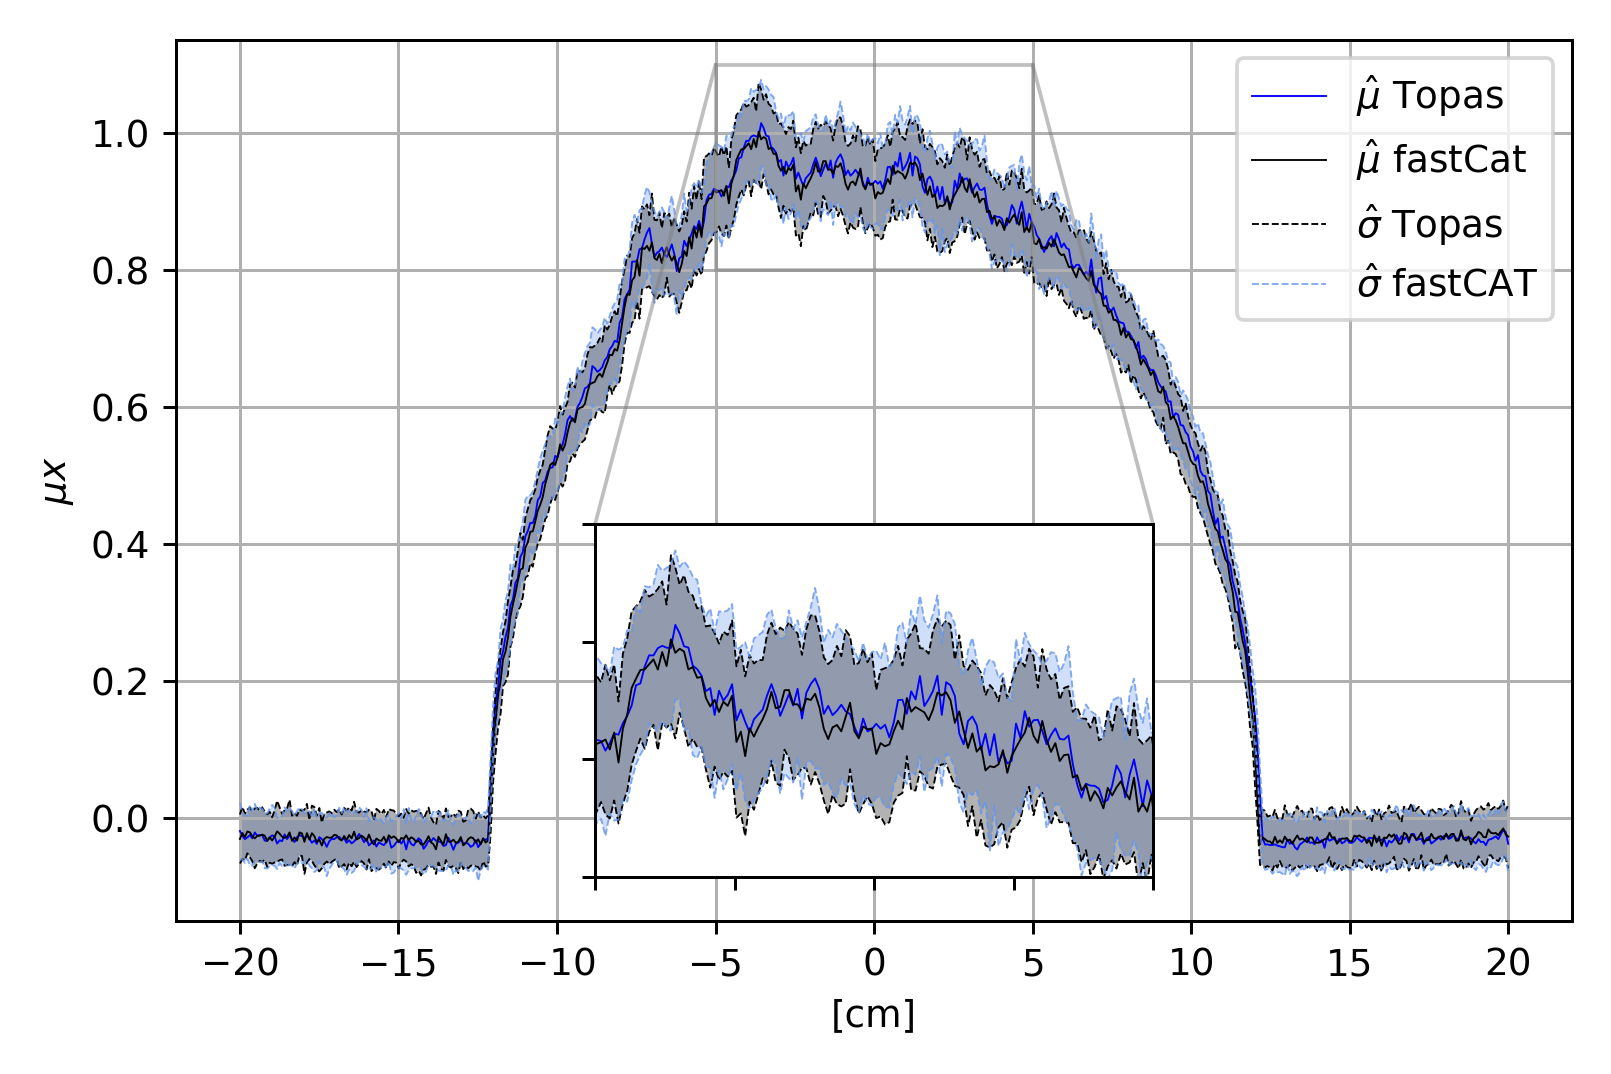

/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  from ipykernel import kernelapp as app
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  app.launch_new_instance()
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDepre

(<matplotlib.patches.Rectangle at 0x7f488856d690>,
 (<matplotlib.patches.ConnectionPatch at 0x7f48873fb710>,
  <matplotlib.patches.ConnectionPatch at 0x7f4887410a90>))

In [3]:
topas = np.load('/home/xcite/scintillators/Catphan_dose/batch_submission/projs_new_npys.npy')

# for figures W25CWOcoh_working.npy
fastCat = np.load('/home/xcite/fastCAT/xpecgen/data/projs/similar_noise7.npy')#fastCat_topas_equiv_8cm_W.npy')

fig = plt.figure(figsize=[6,4],dpi=300)

ax = fig.add_subplot(111)

plt.fill_between(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10, 
                 np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10 ,alpha=0.3, facecolor='cornflowerblue')

plt.fill_between(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),
                 np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),alpha=0.3, facecolor='k')
plt.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10,lineWidth= .5,color='b')
plt.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1),lineWidth= .5,color='k')
    
plt.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

plt.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

plt.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

plt.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

plt.legend(['$\hat{\mu}$ Topas','$\hat{\mu}$ fastCat', '$\hat{\sigma}$ Topas', '$\hat{\sigma}$ fastCAT'])
            

# inset axes....
axins = ax.inset_axes([0.3, 0.05, 0.4, 0.4])

axins.fill_between(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10, 
                 np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10 ,alpha=0.3, facecolor='cornflowerblue')

axins.fill_between(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),
                 np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),alpha=0.3, facecolor='k')

axins.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)+np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

axins.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10+np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

axins.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1)-np.std(topas.T[:,:64,0],1),'k--',lineWidth= .5)

axins.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10-np.std(fastCat.T[:,:,0],1)/10,'--',lineWidth= .5,color='cornflowerblue',alpha=0.8)

axins.plot(np.linspace(-20,20,512),np.mean(fastCat.T[:,:,0],1)/10,lineWidth= .5,color='b')
axins.plot(np.linspace(-20,20,512),np.mean(topas.T[:,:64,0],1),lineWidth= .5,color='k')

plt.grid()
# sub region of the original image
x1, x2, y1, y2 = -5, 5, 0.8, 1.1
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels('')
axins.set_yticklabels('')

plt.ylabel('$\mu x$')
plt.xlabel('[cm]')
plt.tight_layout()

ax.indicate_inset_zoom(axins)